## Metody Nieparametryczne w Statystyce
# Zadanie 2
Za pomocą odpowiednich symulacji zbadać odsetek odrzuceń prawdziwej hipotezy głównej (tzn. błąd
I rodzaju) w teście Kołmogorowa i teście 𝜒
2 w przypadku weryfikacji zgodności z rozkładem 𝜒
2 o
różnych stopniach swobody, tzn. generować dane pochodzące z rozkładu 𝜒
2 o 𝑘 stopniach swobody i
weryfikować hipotezę, że dane mają rozkład 𝜒
2 o 𝑘 st. swobody. Należy porównać wyniki
klasycznego sposobu testowania i testowania z wykorzystaniem PIT (probability integral transform).
### autor: Maciej Komosa

1. Importowanie potrzebnych bibliotek

In [1]:
import numpy as np, pandas as pd
from scipy.stats import kstest, chi2, uniform

2. Odsetek odrzuceń hipotezy głównej (błąd I rodzaju) z uwzględnieniem liczby danych oraz liczby stopni swobody 

a) sposób klasyczny

<Axes: xlabel='sample size', ylabel='type I error'>

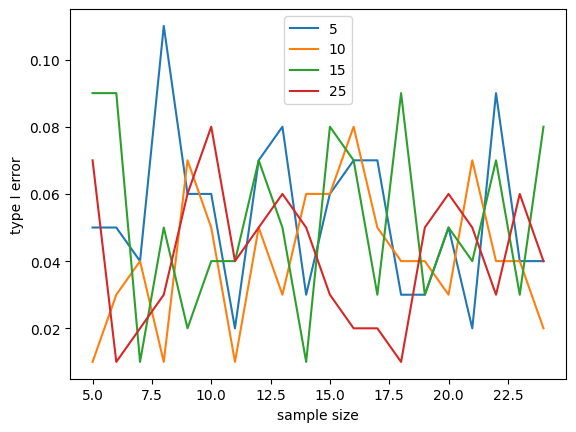

In [3]:
results = pd.DataFrame(columns=["5", "10", "15", "25"])
buf = []

for n in range (5, 25):
    for i in range (0, 100):
        for df in [5, 10, 15, 25]:
            #generowanie wektora liczbowego z rozkładu chi kwadrat
            x = chi2(df).rvs(size=n)
            #test kolmogorowa-smirnova
            buf.append(kstest(x, chi2(df).cdf)[1] < 0.05)

    results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
    buf.clear()

results.plot(xlabel="sample size", ylabel="type I error", legend=True)

Jak można zauważyć, błąd I rodzaju jest duży już od bardzo małych wartości wielkości próbki. 

b) PIT

<Axes: ylabel='type I error'>

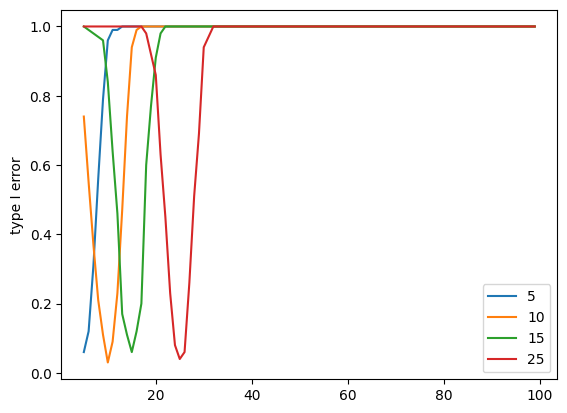

In [4]:
results = pd.DataFrame(columns=["5", "10", "15", "25"])

for n in range (5, 100):
    for i in range (0, 100):
        for m in [5, 10, 15, 25]:
            #generowanie wektora liczbowego z rozkładu chi kwadrat
            #i przekształcanie go za pomocą dystrybuanty chi kwadrat
            x = chi2.cdf(np.random.chisquare(m, n), n)
            #test kolmogorowa-smirnova
            buf.append(kstest(x, uniform.cdf)[1] < 0.05)

    results.loc[n] = [np.mean(buf[0::4]), np.mean(buf[1::4]), np.mean(buf[2::4]), np.mean(buf[3::4])]
    buf.clear()
    
results.plot(ylabel="type I error", legend=True)

Jak widać, rezultaty są znacznie różne, w przypadku PIT test ma odsetek błędu zbliżony do poziomu istotności w okolicach wartości oczekiwanej próbki danych:

In [10]:
for df in [5, 10, 15, 25]:
    print("dla ", df, " stopni swobody wartość oczekiwana wynosi: ", np.mean(chi2.rvs(df, size=1000)))

dla  5  stopni swobody wartość oczekiwana wynosi:  5.029672248552789
dla  10  stopni swobody wartość oczekiwana wynosi:  10.129175961189125
dla  15  stopni swobody wartość oczekiwana wynosi:  14.976409422549056
dla  25  stopni swobody wartość oczekiwana wynosi:  24.972004706888715
